In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Exercise 10.

In [2]:
from sklearn.datasets import fetch_olivetti_faces

help(fetch_olivetti_faces)

Help on function fetch_olivetti_faces in module sklearn.datasets._olivetti_faces:

fetch_olivetti_faces(*, data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)
    Load the Olivetti faces data-set from AT&T (classification).
    
    Download it if necessary.
    
    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================
    
    Read more in the :ref:`User Guide <olivetti_faces_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    shuffle : boolean, optional
        If True the order of the dataset is shuffled to avoid having
        images

In [3]:
X, y = fetch_olivetti_faces(return_X_y=True)
print(y)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_idx, valid_test_idx in split.split(X, y):
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_valid_test = X[valid_test_idx]
    y_valid_test = y[valid_test_idx]

In [5]:
print(len(X_train), len(y_train))

280 280


In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for valid_idx, test_idx in split.split(X_valid_test, y_valid_test):
    X_valid = X_valid_test[valid_idx]
    y_valid = y_valid_test[valid_idx]
    X_test = X_valid_test[test_idx]
    y_test = y_valid_test[test_idx]

In [7]:
print(len(X_valid), len(y_valid))
print(len(X_test), len(y_test))

60 60
60 60


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)

X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

In [9]:
pca.n_components_

104

In [10]:
from sklearn.cluster import KMeans

kmeans_per_k = []

for k in range(40, 200, 5):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

In [11]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k]
best_idx = np.argmax(silhouette_scores)
best_k = range(40, 200, 5)[best_idx]
best_score = silhouette_scores[best_idx]

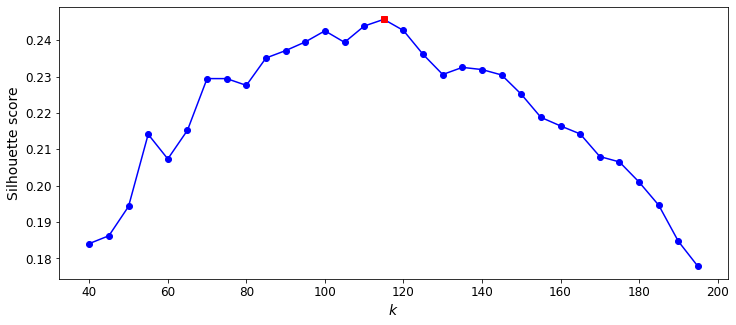

best k: 115


In [12]:
plt.figure(figsize=(12, 5))
plt.plot(range(40, 200, 5), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()
print(f'best k: {best_k}')

In [13]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_idx]

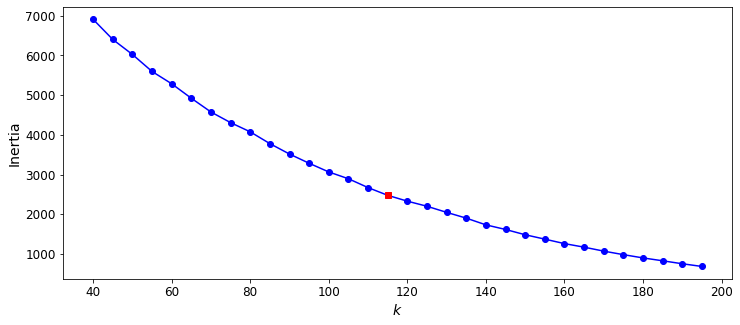

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(range(40, 200, 5), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [15]:
best_model = kmeans_per_k[best_idx]

Cluster 0


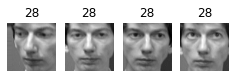

Cluster 1


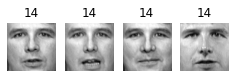

Cluster 2


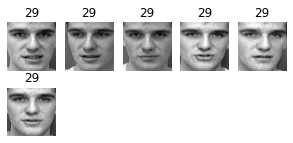

Cluster 3


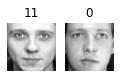

Cluster 4


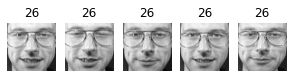

Cluster 5


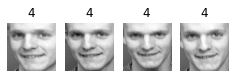

Cluster 6


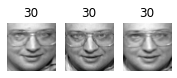

Cluster 7


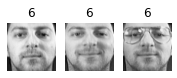

Cluster 8


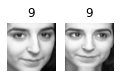

Cluster 9


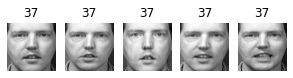

Cluster 10


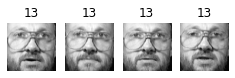

Cluster 11


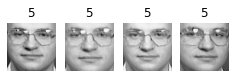

Cluster 12


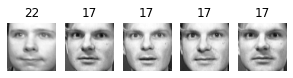

Cluster 13


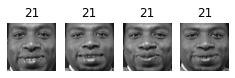

Cluster 14


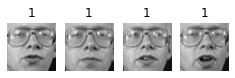

Cluster 15


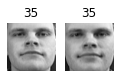

Cluster 16


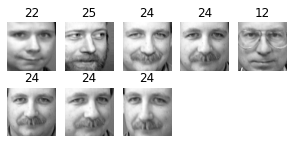

Cluster 17


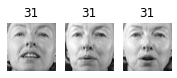

Cluster 18


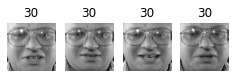

Cluster 19


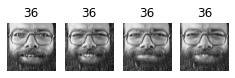

Cluster 20


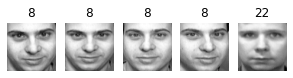

Cluster 21


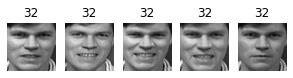

Cluster 22


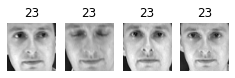

Cluster 23


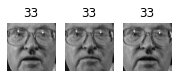

Cluster 24


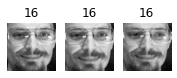

Cluster 25


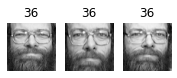

Cluster 26


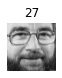

Cluster 27


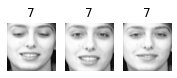

Cluster 28


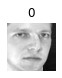

Cluster 29


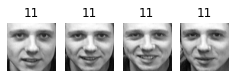

Cluster 30


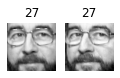

Cluster 31


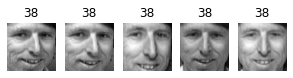

Cluster 32


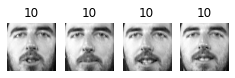

Cluster 33


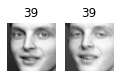

Cluster 34


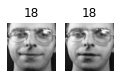

Cluster 35


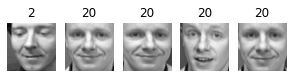

Cluster 36


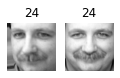

Cluster 37


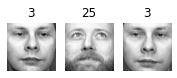

Cluster 38


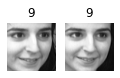

Cluster 39


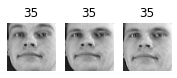

Cluster 40


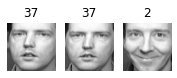

Cluster 41


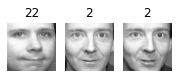

Cluster 42


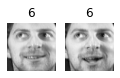

Cluster 43


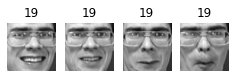

Cluster 44


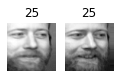

Cluster 45


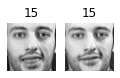

Cluster 46


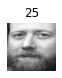

Cluster 47


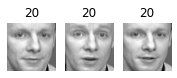

Cluster 48


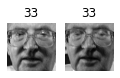

Cluster 49


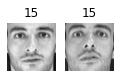

Cluster 50


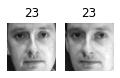

Cluster 51


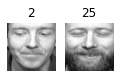

Cluster 52


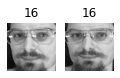

Cluster 53


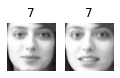

Cluster 54


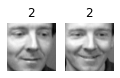

Cluster 55


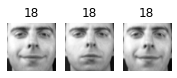

Cluster 56


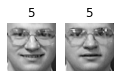

Cluster 57


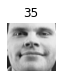

Cluster 58


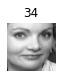

Cluster 59


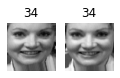

Cluster 60


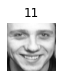

Cluster 61


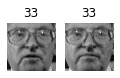

Cluster 62


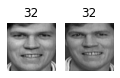

Cluster 63


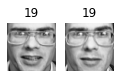

Cluster 64


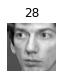

Cluster 65


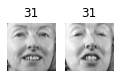

Cluster 66


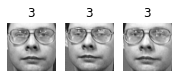

Cluster 67


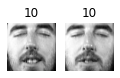

Cluster 68


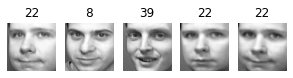

Cluster 69


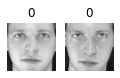

Cluster 70


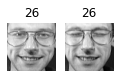

Cluster 71


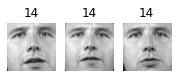

Cluster 72


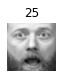

Cluster 73


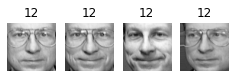

Cluster 74


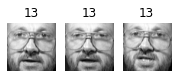

Cluster 75


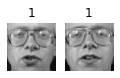

Cluster 76


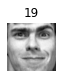

Cluster 77


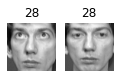

Cluster 78


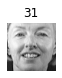

Cluster 79


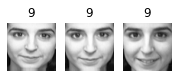

Cluster 80


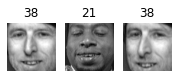

Cluster 81


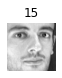

Cluster 82


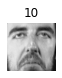

Cluster 83


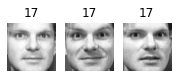

Cluster 84


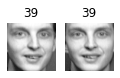

Cluster 85


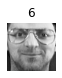

Cluster 86


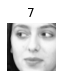

Cluster 87


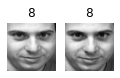

Cluster 88


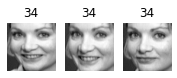

Cluster 89


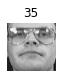

Cluster 90


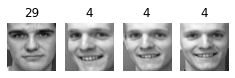

Cluster 91


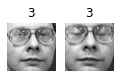

Cluster 92


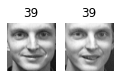

Cluster 93


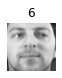

Cluster 94


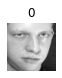

Cluster 95


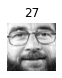

Cluster 96


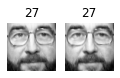

Cluster 97


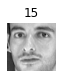

Cluster 98


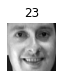

Cluster 99


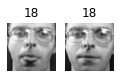

Cluster 100


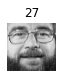

Cluster 101


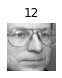

Cluster 102


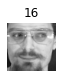

Cluster 103


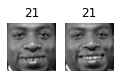

Cluster 104


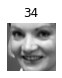

Cluster 105


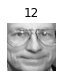

Cluster 106


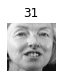

Cluster 107


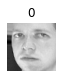

Cluster 108


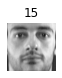

Cluster 109


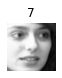

Cluster 110


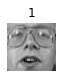

Cluster 111


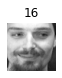

Cluster 112


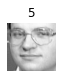

Cluster 113


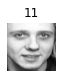

Cluster 114


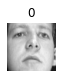

In [16]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Exercise 11.

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=42)
lgbm_clf.fit(X_train, y_train)
lgbm_clf.score(X_valid, y_valid)

0.7333333333333333

In [18]:
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=42)
lgbm_clf.fit(X_train_pca, y_train)
lgbm_clf.score(X_valid_pca, y_valid)

0.6833333333333333

In [19]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=42)
lgbm_clf.fit(X_train_reduced, y_train)
lgbm_clf.score(X_valid_reduced, y_valid)

0.7166666666666667

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_valid, y_valid)

0.55

In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_pca, y_train)
tree_clf.score(X_valid_pca, y_valid)

0.43333333333333335

In [22]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_reduced, y_train)
tree_clf.score(X_valid_reduced, y_valid)

0.5666666666666667

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_valid, y_valid)

0.9166666666666666

In [24]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_pca, y_train)
rf_clf.score(X_valid_pca, y_valid)

0.8333333333333334

In [25]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_reduced, y_train)
rf_clf.score(X_valid_reduced, y_valid)

0.7666666666666667